In [1]:
import tensorflow
from tensorflow import keras

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Cotton_disease/train_/train'
valid_path = '/content/drive/My Drive/Cotton_disease/test_/test'

In [4]:
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

234553344/234545216 [==============================] - 3s 0us/step


In [5]:
for layer in resnet152V2.layers:
    layer.trainable = False

In [6]:
folders = glob('/content/drive/My Drive/Cotton_disease/train_/train/*')

In [7]:
folders

['/content/drive/My Drive/Cotton_disease/train_/train/diseased cotton plant',
 '/content/drive/My Drive/Cotton_disease/train_/train/fresh cotton plant',
 '/content/drive/My Drive/Cotton_disease/train_/train/diseased cotton leaf',
 '/content/drive/My Drive/Cotton_disease/train_/train/fresh cotton leaf']

In [8]:
x = Flatten()(resnet152V2.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)


In [10]:
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [11]:

# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_______________________________________________________________________________________

In [12]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Cotton_disease/train_/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Cotton_disease/test_/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [16]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 896s 15s/step - loss: 1.3670 - accuracy: 0.8109 - val_loss: 0.2432 - val_accuracy: 0.9444
Epoch 2/20
61/61 [==============================] - 38s 628ms/step - loss: 0.4166 - accuracy: 0.9364 - val_loss: 0.2009 - val_accuracy: 0.9444
Epoch 3/20
61/61 [==============================] - 38s 624ms/step - loss: 0.3453 - accuracy: 0.9431 - val_loss: 1.3761 - val_accuracy: 0.8889
Epoch 4/20
61/61 [==============================] - 38s 621ms/step - loss: 0.3687 - accuracy: 0.9467 - val_loss: 0.8915 - val_accuracy: 0.9444
Epoch 5/20
61/61 [==============================] - 38s 622ms/step - loss: 0.3756 - accuracy: 0.9493 - val_loss: 0.6735 - val_accuracy: 0.8889
Epoch 6/20
61/61 [==============================] - 38s 622ms/step - loss: 0.3686 - accuracy: 0.9534 - val_loss: 0.3418 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 38s 624ms/step 

In [17]:
from tensorflow.keras.models import load_model

model.save('resnet152V2.h5')

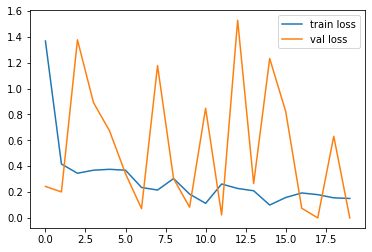

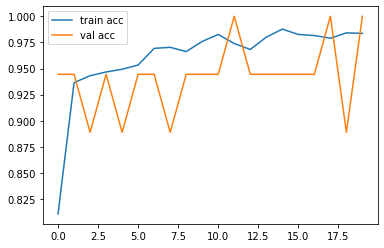

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')